# Data Cleaning with Python (Part 2)

In this topic, we’ll focus on two essential data cleaning tasks:
1. **Handling Duplicates** – Identifying and removing duplicate rows to avoid skewing analysis.
2. **Detecting and Handling Outliers** – Identifying outliers that may distort data insights and deciding how to handle them.

**Note:** After reading the instructions, run the cell to see the results.


### Import Libraries and Load Data

First, we need to import the necessary libraries and load our dataset that was cleaned in Part 1. Pandas is the primary library we’ll use to manipulate our data.


In [13]:
# Importing the Pandas library
import pandas as pd

# Loading the dataset
df = pd.read_csv('cleaned_data.csv')

# Displaying the first few rows of the dataset
df.head()

,CustomerID,TransactionID,Transaction Date,Product Name,Product Category,Quantity,Price Per Unit,Payment Method,Customer Age,Total Amount
0,CUST041,TXN0001,2023-12-14,Tablet,Electronics,9.0,229.78,Debit Card,34.0,2068.02
1,CUST008,TXN0002,2023-12-02,Tablet,Electronics,4.0,443.23,Debit Card,39.0,1772.92
2,CUST002,TXN0003,2023-12-01,Smartphone,Electronics,4.0,221.94,Cash,34.0,887.76
3,CUST048,TXN0004,2023-08-07,Monitor,Electronics,9.0,226.87,Debit Card,47.0,2041.83
4,CUST018,TXN0005,2023-06-27,Laptop,Electronics,1.0,169.77,Debit Card,71.0,169.77



## 1. Handling Duplicates

Duplicate rows can occur when data is entered multiple times or combined from multiple sources. Removing these duplicates is crucial to maintain accurate data.

-  **Identify Duplicate Rows**  
   Use `.duplicated()` to find duplicate rows in the dataset.


In [14]:
# Identify duplicate rows
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
    CustomerID TransactionID Transaction Date Product Name Product Category  \
200    CUST041       TXN0001       2023-12-14       Tablet      Electronics   

     Quantity  Price Per Unit Payment Method  Customer Age   Total Amount   
200       9.0          229.78     Debit Card          34.0         2068.02  


- We can see that there is a presence of duplicate rows. Let's count the total number of rows so that, after removing the duplicate, we can confirm it was successfully removed.


In [15]:
# Count the total number of rows
row_count = df.shape[0] # df.shape[0] returns the number of rows in the DataFrame.
print("Total number of rows:", row_count)

Total number of rows: 201


### Remove Duplicate Rows
Use `.drop_duplicates()` to remove duplicates from the dataset.

In [16]:
# Remove duplicate rows
df = df.drop_duplicates()

# Verify removal
print("Number of rows after removing duplicates:", df.shape[0])

Number of rows after removing duplicates: 200


## Additional Tip

### Remove Duplicates Based on Specific Columns

Sometimes, duplicates in certain columns need to be handled specifically (e.g., `Transaction ID`). To drop duplicates based on specific columns, pass a list of column names to `.drop_duplicates()`.

```python
# Remove duplicates based on 'Transaction ID' only
df = df.drop_duplicates(subset=['Transaction ID'])

# Remove duplicates based on multiple columns, such as 'Transaction ID' and 'Customer ID'
df = df.drop_duplicates(subset=['Transaction ID', 'Customer ID'])


# 2. Handling Outliers 

In this topic, we’ll focus on identifying and handling outliers in the `Total Amount` column using two common techniques:
1. **Box Plot Technique**
2. **Standard Deviation Technique**

Outliers can significantly affect data analysis and model performance, so it's important to handle them carefully.

## a) Using a Box Plot to Identify Outliers

The box plot provides a visual overview, allowing us to quickly spot potential outliers. This is useful for initial data exploration and understanding whether any extreme values are present in a particular column. Now, we’ll create a box plot for the `Total Amount` column to quickly spot any outliers in the data.

In [17]:
#Before we begin, ensure that the required libraries are imported.
import pandas as pd
import matplotlib.pyplot as plt

The Total Amount column has picked up some whitespace around its name, so let's remove it.

In [ ]:
df = df.rename({' Total Amount ': 'Total Amount'}, axis=1)
df.columns

Index(['CustomerID', 'TransactionID', 'Transaction Date', 'Product Name',
       'Product Category', 'Quantity', 'Price Per Unit', 'Payment Method',
       'Customer Age', 'Total Amount'],
      dtype='object')

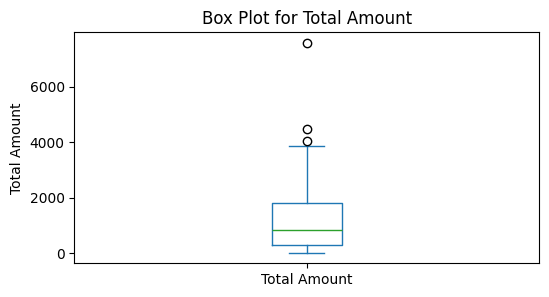

In [21]:
# Create a box plot for 'Total Amount' to visualise outliers
plt.figure(figsize=(6, 3)) # Sets the size of the plot.
df['Total Amount'].plot(kind='box') # Creates a box plot for the `Total Amount` column.
plt.title('Box Plot for Total Amount') # Adding title
plt.ylabel('Total Amount') # Adds labels for clarity.
plt.show()


### Interpreting the Box Plot:
- The box represents the interquartile range (IQR), where the middle 50% of the data lies.
- The line inside the box shows the median.
- Points outside the "whiskers" (horizontal lines extending from the box) are potential outliers.

In our dataset, we can see that there are 3 potential outliers based on the box plot. The box plot is a quick visualisation tool that helps us identify possible outliers in a dataset. However, in cases where we have a defined threshold, it’s often more precise to use the **Standard Deviation (SD) method**.


## b) Identifying Outliers Using the Standard Deviation Technique

While box plots are great for visualisation, the **SD method** can be more effective for adjusting or removing outliers, especially when working with threshold values. By using the SD technique, we can precisely define which data points fall outside of the acceptable range based on statistical calculations.

### Steps:

1. **Calculate Mean and Standard Deviation**

In [22]:
# Calculate the mean and standard deviation for the 'Total Amount' column
mean = df['Total Amount'].mean()
std_dev = df['Total Amount'].std()
print("The mean is: ", mean)
print("The standard deviation is: ", std_dev)

The mean is:  1229.81595
The standard deviation is:  1147.6596151574797


### 2. Define Outlier Thresholds

Values below `mean - 3 * std_dev` or above `mean + 3 * std_dev` are considered outliers.


In [23]:
# Define thresholds
upper_bound = mean + 3 * std_dev
lower_bound = mean - 3 * std_dev

print("The upper bound is: ", upper_bound)
print("The lower bound is: ", lower_bound)
print("The lower bound is negative, so it's not applicable as the amount cannot be negative.")


The upper bound is:  4672.79479547244
The lower bound is:  -2213.1628954724392
The lower bound is negative, so it's not applicable as the amount cannot be negative.


In [24]:
# Identify outliers in 'Total Amount' based on the standard deviation technique
outliers_std_dev = df[(df['Total Amount'] > upper_bound)]
print("Outliers in 'Total Amount' using Standard Deviation Technique:")
print(outliers_std_dev)

Outliers in 'Total Amount' using Standard Deviation Technique:
   CustomerID TransactionID Transaction Date Product Name Product Category  \
45    CUST022       TXN0046       2023-04-12       Tablet      Electronics   

    Quantity  Price Per Unit Payment Method  Customer Age  Total Amount  
45     100.0           75.74     Debit Card          77.0        7574.0  


- As we have identified this outlier, we should verify with the business if the total amount of 7,574 is a legitimate purchase with a quantity of 100. If confirmed as valid, we retain this value in the dataset. However, when calculating average transaction amounts, consider excluding this outlier to avoid skewing results or use the median for a more representative measure.
- If not confirmed, we would handle it appropriately, such as by removing or correcting the entry.


In [ ]:
## Save the Cleaned Dataset 

In [25]:
# Export the DataFrame to a CSV file
df.to_csv('cleaned_data_3.csv', index=False)


### Summary

In this topic, we focused on two essential data cleaning tasks:

1. **Handling Duplicates**: We identified and removed duplicate rows to ensure accuracy and prevent skewed analysis.
2. **Identifying Outliers**: We used the standard deviation technique and box plots to detect outliers in the `Total Amount` column for further validation.

By addressing these issues, we’ve ensured a cleaner dataset for analysis. 


# What's Next? 

In the next topic, we will delve into **Data Cleaning with Python (Part 3)**, where we’ll focus on **Feature Engineering and Data Integration**. We will explore combining datasets and creating new features to enhance our analysis.
